In [2]:
import pandas as pd

# Основы Pandas


## Содержание

- Какие типы данных обрабатывает pandas?
- Как читать и записывать табличные данные?
- Как выбрать подмножество DataFrame?
- Как создавать графики в Pandas?
- Как создать новые столбцы на основе существующих столбцов
- Как рассчитать сводную статистику
- Как изменить структуру таблиц
- Как объединить данные из нескольких таблиц
- Как легко обрабатывать данные временных рядов
- Как манипулировать текстовыми данными

## Какие типы данных обрабатывает pandas?



- Scalar - 1 элемент любого типа данных

- Series - 1D структура, похожая на одномерный неизменяемый массив с однородными данными.

- DataFrames - 2D двумерная табличная структура с изменяемым размером и неоднородно типизированными столбцами.

- Panel - 3D трехмерный массив с изменяемым размером.

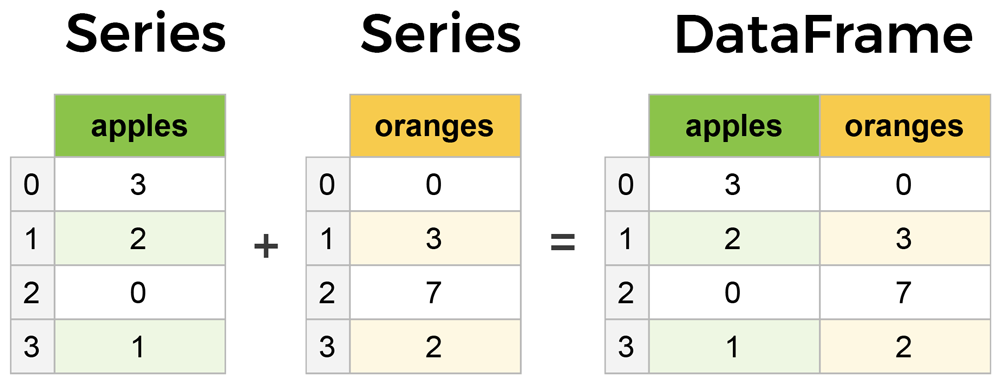

### Конструктор Series() 

In [17]:
seria1 = pd.Series([10, 15, 20], index=range(10, 35, 10))
seria1


10    10
20    15
30    20
dtype: int64

### max()

In [10]:
seria1.max()

20

### Series.index

In [13]:
seria1.index

RangeIndex(start=10, stop=35, step=10)

### Series.values

In [14]:
seria1.values

array([10, 15, 20])

### Доступ по индексу

In [19]:
seria1[30]

20

In [20]:
seria2 = pd.Series([1, 2, 3], index=['c', 'b', 'a'])
seria2['a']

3

In [22]:
seria2[1]

2

### Доступ по нескольким индексам

In [23]:
seria2[['c', 'b']]

c    1
b    2
dtype: int64

### Создание датафрейма с заданными индексами

In [30]:
people = {'Anna':20, 'Vadim':15, 'Den':11}

df3 = pd.DataFrame(people, index=[1,2,3])
df3

,Anna,Vadim,Den
1,20,15,11
2,20,15,11
3,20,15,11


### Создание серии с заданным именем

In [33]:
seria3 = pd.Series([1,2], name='None')
df4 = pd.DataFrame(seria3)
df4

,None
0,1
1,2


### Столбец датафрейма является серией

In [35]:
people_den = df3['Den']
type(people_den)

pandas.core.series.Series

In [36]:
df3[['Den', 'Anna']]

,Den,Anna
1,11,20
2,11,20
3,11,20


In [37]:
seria1

10    10
20    15
30    20
dtype: int64

In [39]:
seria1[20] = 555
seria1

10     10
20    555
30     20
dtype: int64

In [41]:
seria1[[10, 30]] = [111, 222]
seria1

10    111
20    555
30    222
dtype: int64

In [ ]:
seria1[[10, 20, 30]] = [1,2]
seria1

## Как читать и записывать табличные данные?

### Методы pd.read_* и .to_*

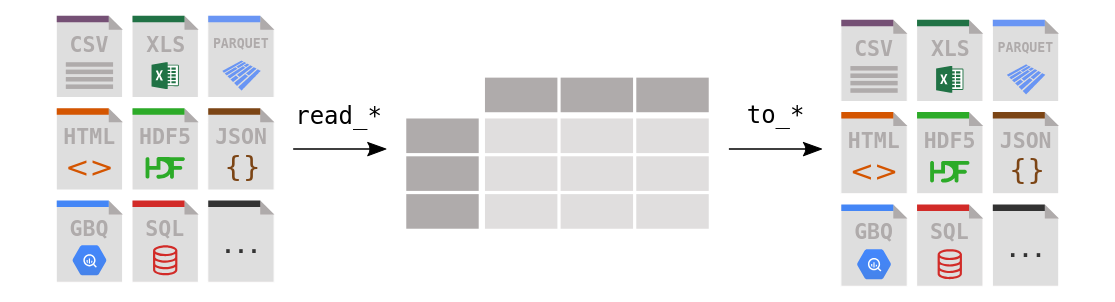

In [19]:
# df = pd.read_*

df = pd.read_csv('../data/titanic.csv')

# df.to_*

# df.to_excel('../data/titanic.xlsx', sheet_name="passengers", index=False)

### Работа с неоднородными данными

In [32]:
from numpy import NaN

In [37]:
data = {
    'a': {
        'aa': [
            {
                'aaa': [1, 2, 3, 's', NaN],
                'bbb': [11, 22, 33, 44, 'Итого:'],
                'ccc': [NaN, NaN, NaN, NaN, 22222222]
            },
        ]
    }
}

dictionary = data['a']['aa'][0]
dictionary

{'aaa': [1, 2, 3, 's', nan],
 'bbb': [11, 22, 33, 44, 'Итого:'],
 'ccc': [nan, nan, nan, nan, 22222222]}

In [38]:
df2 = pd.DataFrame(dictionary)
df2

,aaa,bbb,ccc
0,1,11,NaN
1,2,22,NaN
2,3,33,NaN
3,s,44,NaN
4,NaN,Итого:,22222222.0


In [39]:
df2.to_excel('../data/test.xlsx')

## Как выбрать подмножество DataFrame?

In [2]:
df = pd.read_csv('../data/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
name_age = df[['Name', 'Age']]
type(name_age)

pandas.core.frame.DataFrame

In [4]:
names = df['Name']
type(names)

pandas.core.series.Series

### Определние размерности с помощью shape

In [45]:
name_age.shape

(891, 2)

In [48]:
names.shape

(891,)

In [54]:
name_age.T.shape

(2, 891)

In [55]:
name_age

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
...,...,...
886,"Montvila, Rev. Juozas",27.0
887,"Graham, Miss. Margaret Edith",19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN
889,"Behr, Mr. Karl Howell",26.0


### Выбор строк по условию

In [6]:
name_age['Age'] < 18

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [56]:
childs = name_age[name_age['Age'] < 18]
childs

,Name,Age
7,"Palsson, Master. Gosta Leonard",2.0
9,"Nasser, Mrs. Nicholas (Adele Achem)",14.0
10,"Sandstrom, Miss. Marguerite Rut",4.0
14,"Vestrom, Miss. Hulda Amanda Adolfina",14.0
16,"Rice, Master. Eugene",2.0
...,...,...
850,"Andersson, Master. Sigvard Harald Elias",4.0
852,"Boulos, Miss. Nourelain",9.0
853,"Lines, Miss. Mary Conover",16.0
869,"Johnson, Master. Harold Theodor",4.0


Доступные операторы сравнения:
- " < > "
- " >= <= " 
- " == != "

Доступные математические операторы над осями:
- " + - "
- " * / "

In [61]:
l = [True, True, False, False, True]

df2[l]

,aaa,bbb,ccc
0,1,11,NaN
1,2,22,NaN
4,NaN,Итого:,22222222.0


In [62]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Задание

Вывести строки в которых билет состоит из двух частей разделённых пробелом.

In [67]:
def func(value) -> bool: 
    
    return 

In [66]:
result = []
for value in df['Ticket'].values:
    pass

A/5 21171
PC 17599
STON/O2. 3101282
113803
373450


## Как создавать графики в Pandas?

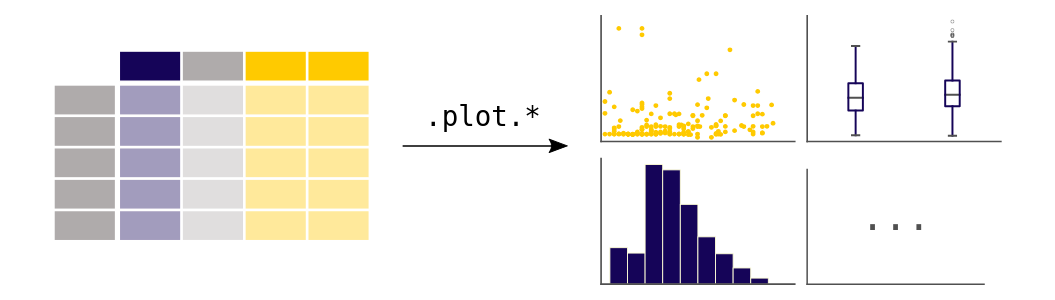

In [5]:
import matplotlib.pyplot as plt

In [6]:
air_quality = pd.read_csv('../data/air_quality_no2.csv', index_col=0, parse_dates=True)
air_quality.head()

,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN


In [27]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1035 entries, 2019-05-07 02:00:00 to 2019-06-21 02:00:00
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   station_antwerp  95 non-null     float64
 1   station_paris    1004 non-null   float64
 2   station_london   969 non-null    float64
dtypes: float64(3)
memory usage: 32.3 KB


<Axes: xlabel='datetime'>

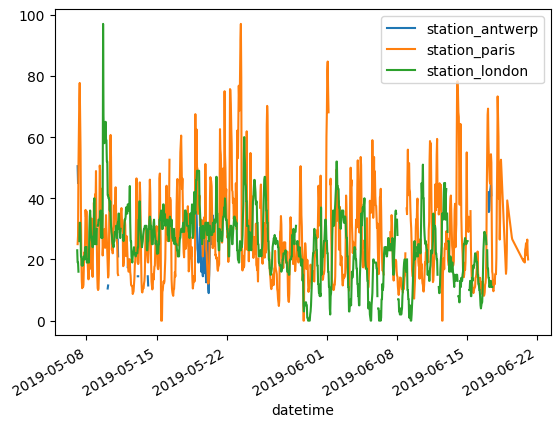

In [8]:
air_quality.plot()
# plot.show()

<Axes: xlabel='datetime'>

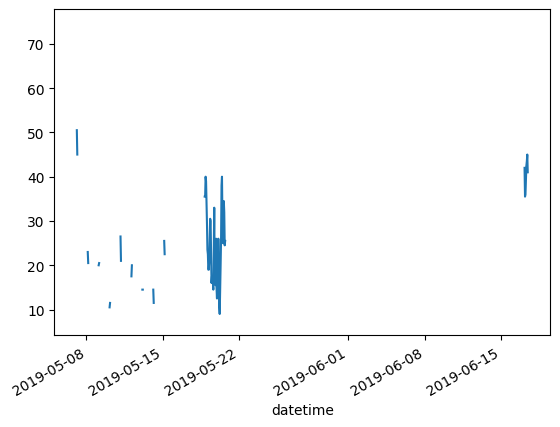

In [9]:
air_quality['station_antwerp'].plot()

array([<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>], dtype=object)

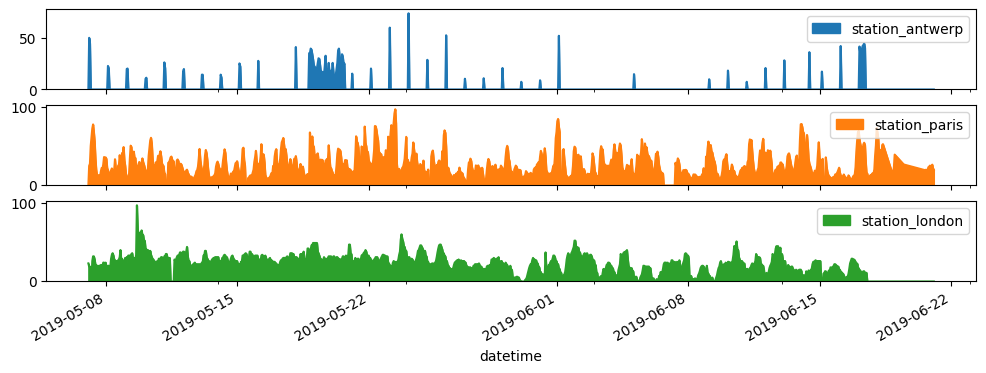

In [11]:
air_quality.plot.area(figsize=(12, 4), subplots=True)

<Axes: xlabel='station_london', ylabel='station_paris'>

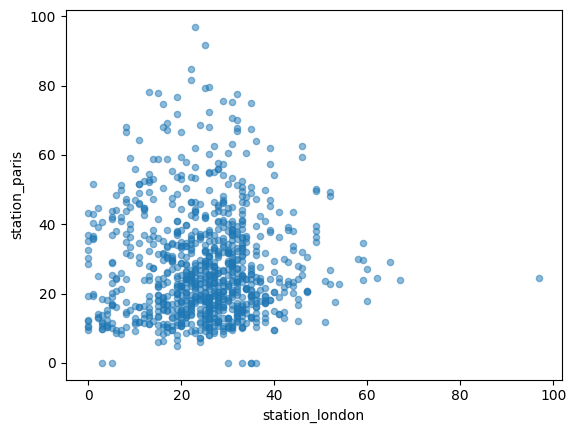

In [16]:
air_quality.plot.scatter(x='station_london', y='station_paris', alpha=0.5)

In [18]:
[method for method in dir(air_quality.plot) if not method.startswith('_')]


['area',
 'bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter']

<Axes: >

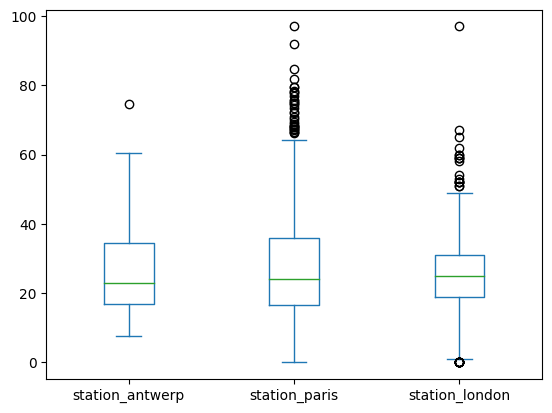

In [19]:
air_quality.plot.box()

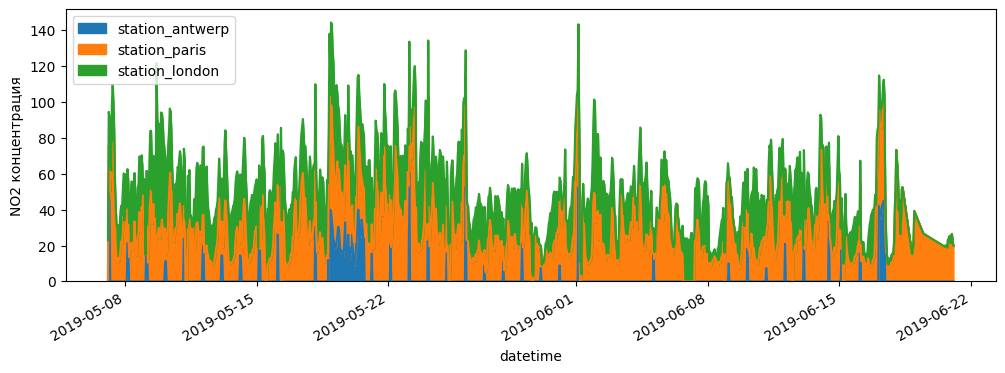

In [21]:
fig, axs = plt.subplots(figsize=(12, 4))
air_quality.plot.area(ax=axs)
axs.set_ylabel('NO2 концентрация')
fig.savefig('no2_concentration.png')

### Подробнее

In [24]:
df = pd.DataFrame(
    {
        'Year':['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'],
        'Sales':[4107,6492,1476,8508,7416,2747,1606,7947,9506,5441,7617,847,4389,3139,7546,3150,4426,4969,8457,5491]
    }
)
df

,Year,Sales
0,2000,4107
1,2001,6492
2,2002,1476
3,2003,8508
4,2004,7416
5,2005,2747
6,2006,1606
7,2007,7947
8,2008,9506
9,2009,5441


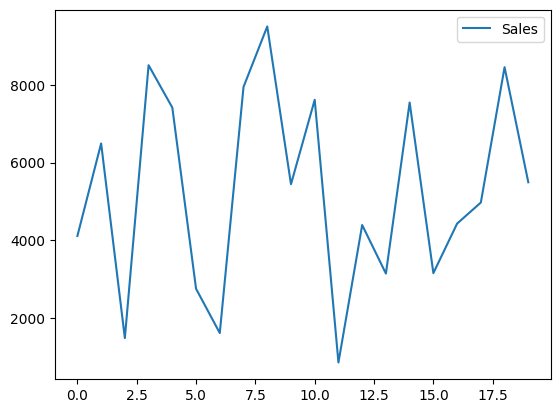

In [26]:
df.plot();

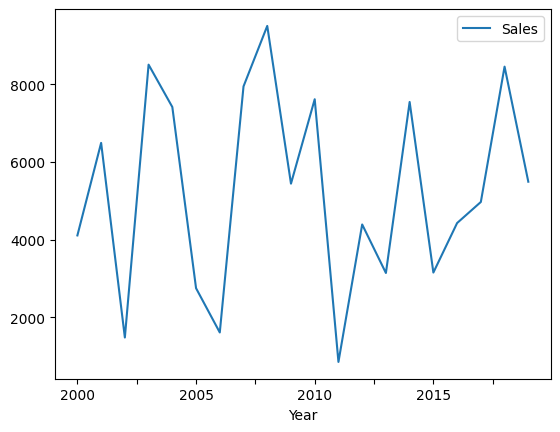

In [30]:
df.plot(x='Year');

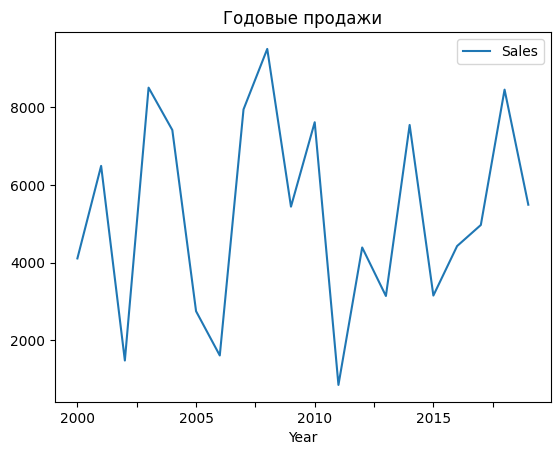

In [31]:
df.plot(x='Year', title='Годовые продажи');

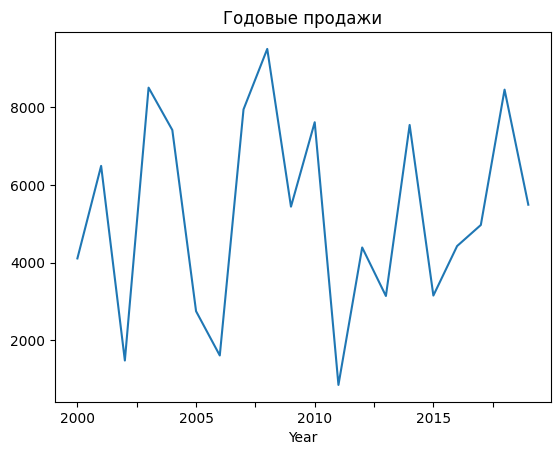

In [32]:
df.plot(x='Year', title='Годовые продажи', legend=False);

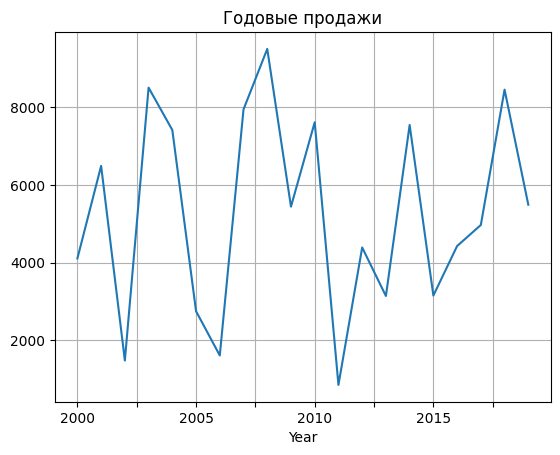

In [33]:
df.plot(x='Year', title='Годовые продажи', legend=False, grid=True);

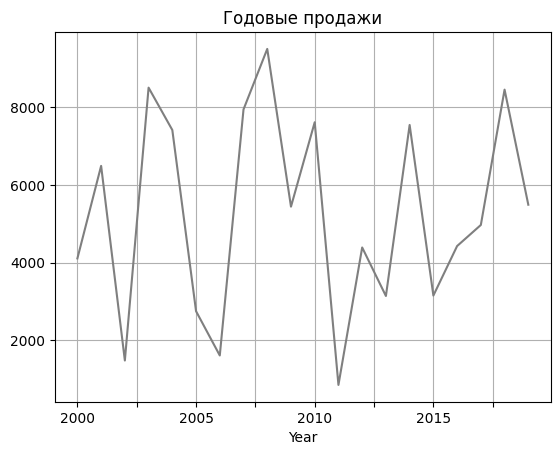

In [36]:

df.plot(x='Year', title='Годовые продажи', legend=False, grid=True, color='tab:gray');

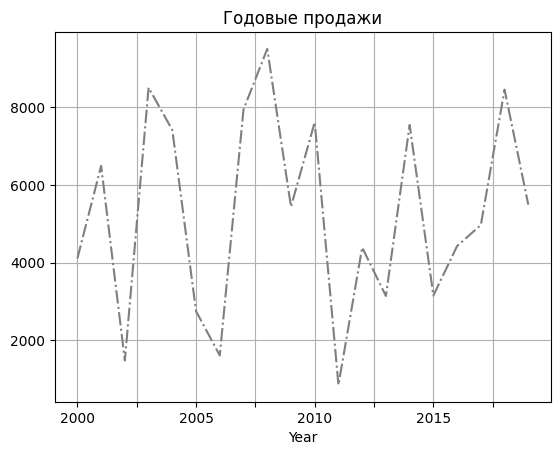

In [40]:
# linestyle: '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
df.plot(x='Year', title='Годовые продажи', legend=False, grid=True, color='tab:gray', linestyle='-.');


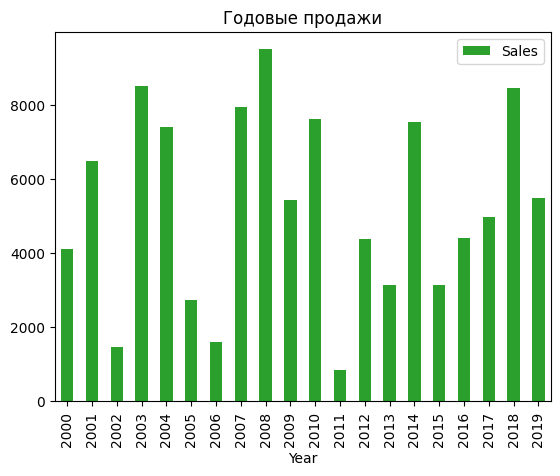

In [41]:
df.plot(kind='bar', x='Year', y='Sales', title='Годовые продажи', color='tab:green');

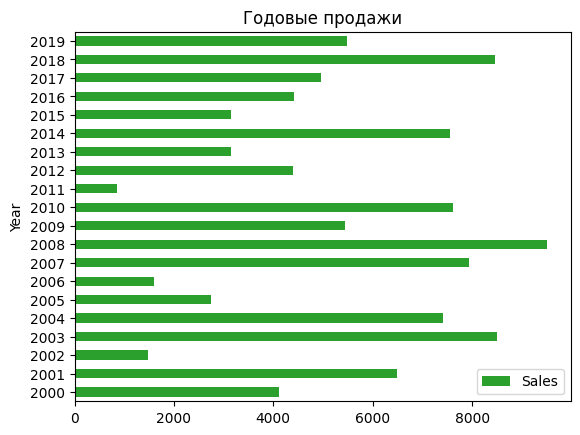

In [42]:
df.plot(kind='barh', x='Year', y='Sales', title='Годовые продажи', color='tab:green');

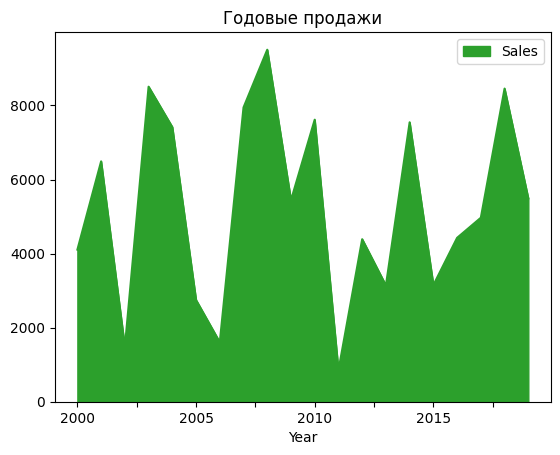

In [43]:
df.plot(kind='area', x='Year', y='Sales', title='Годовые продажи', color='tab:green');

## Как создать новые столбцы на основе существующих столбцов

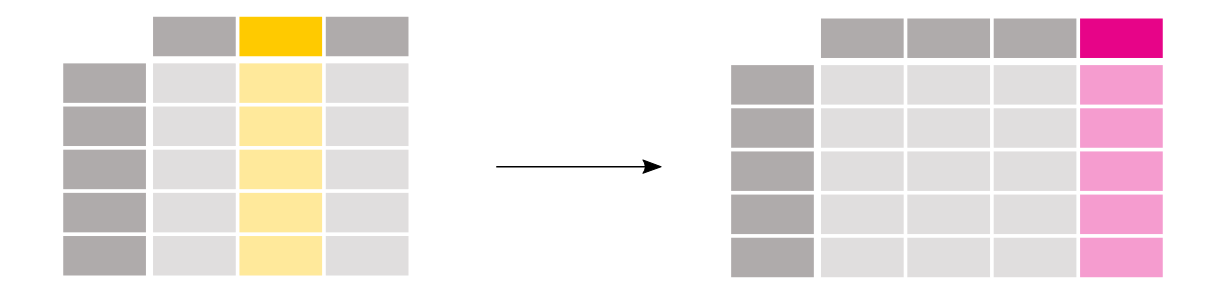

In [2]:
air_quality = pd.read_csv('../data/air_quality_no2.csv', index_col=0, parse_dates=True)
air_quality.head()

,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN


In [10]:
air_quality['london_mg_per_cub'] = air_quality['station_london'] * 1.882
air_quality

,station_antwerp,station_paris,station_london,london_mg_per_cub
datetime,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286
2019-05-07 03:00:00,50.5,25.0,19.0,35.758
2019-05-07 04:00:00,45.0,27.7,19.0,35.758
2019-05-07 05:00:00,NaN,50.4,16.0,30.112
2019-05-07 06:00:00,NaN,61.9,NaN,NaN
...,...,...,...,...
2019-06-20 22:00:00,NaN,21.4,NaN,NaN
2019-06-20 23:00:00,NaN,24.9,NaN,NaN
2019-06-21 00:00:00,NaN,26.5,NaN,NaN


In [15]:
air_quality['ratio_paris_london'] = air_quality['station_paris'] / air_quality['station_london']
air_quality

,station_antwerp,station_paris,station_london,london_mg_per_cub,ratio_paris_london
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,1.315789
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,1.457895
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,3.150000
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN
...,...,...,...,...,...
2019-06-20 22:00:00,NaN,21.4,NaN,NaN,NaN
2019-06-20 23:00:00,NaN,24.9,NaN,NaN,NaN
2019-06-21 00:00:00,NaN,26.5,NaN,NaN,NaN


### Математические операторы и операторы сравнения

"+ - * / // % **"

"> >= < <= == !="

Для более сложных вычислений можно применить метод apply()

### Переименование столбцов

In [17]:
air_quality_renamed = air_quality.rename(
    columns={
        'station_antwerp': 'Antwerp',
        'station_paris': 'Paris',
        'station_london': 'London',
    }
)
air_quality_renamed

,Antwerp,Paris,London,london_mg_per_cub,ratio_paris_london
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,1.315789
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,1.457895
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,3.150000
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN
...,...,...,...,...,...
2019-06-20 22:00:00,NaN,21.4,NaN,NaN,NaN
2019-06-20 23:00:00,NaN,24.9,NaN,NaN,NaN
2019-06-21 00:00:00,NaN,26.5,NaN,NaN,NaN


In [20]:
air_quality_renamed = air_quality_renamed.rename(columns=str.capitalize)
air_quality_renamed

,Antwerp,Paris,London,London_mg_per_cub,Ratio_paris_london
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,1.315789
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,1.457895
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,3.150000
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN
...,...,...,...,...,...
2019-06-20 22:00:00,NaN,21.4,NaN,NaN,NaN
2019-06-20 23:00:00,NaN,24.9,NaN,NaN,NaN
2019-06-21 00:00:00,NaN,26.5,NaN,NaN,NaN


In [25]:
import numpy as np
air_quality_renamed['empty'] = np.NaN
air_quality_renamed

,Antwerp,Paris,London,London_mg_per_cub,Ratio_paris_london,empty
datetime,,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,1.315789,NaN
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,1.457895,NaN
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,3.150000,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2019-06-20 22:00:00,NaN,21.4,NaN,NaN,NaN,NaN
2019-06-20 23:00:00,NaN,24.9,NaN,NaN,NaN,NaN
2019-06-21 00:00:00,NaN,26.5,NaN,NaN,NaN,NaN


## Как рассчитать сводную статистику

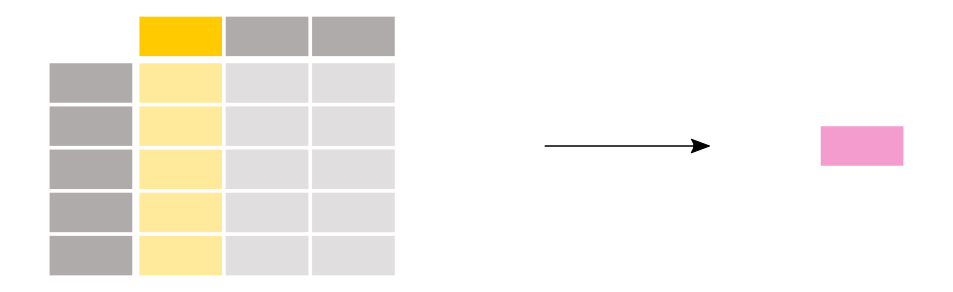

In [29]:
df = pd.read_csv('../data/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
df['Age'].mean()

29.69911764705882

In [34]:
df['Age'].median()

28.0

In [37]:
median_df = pd.DataFrame([1, 2, 3, 4, 5, 5, 6, 10, 10, 10, 10, 10])
median_df.median()

0    5.5
dtype: float64

In [33]:
df[['Age', 'Pclass', 'Fare']].mean()

Age       29.699118
Pclass     2.308642
Fare      32.204208
dtype: float64

In [38]:
df[['Age', 'Pclass', 'Fare']].describe()

,Age,Pclass,Fare
count,714.000000,891.000000,891.000000
mean,29.699118,2.308642,32.204208
std,14.526497,0.836071,49.693429
min,0.420000,1.000000,0.000000
25%,20.125000,2.000000,7.910400
50%,28.000000,3.000000,14.454200
75%,38.000000,3.000000,31.000000
max,80.000000,3.000000,512.329200


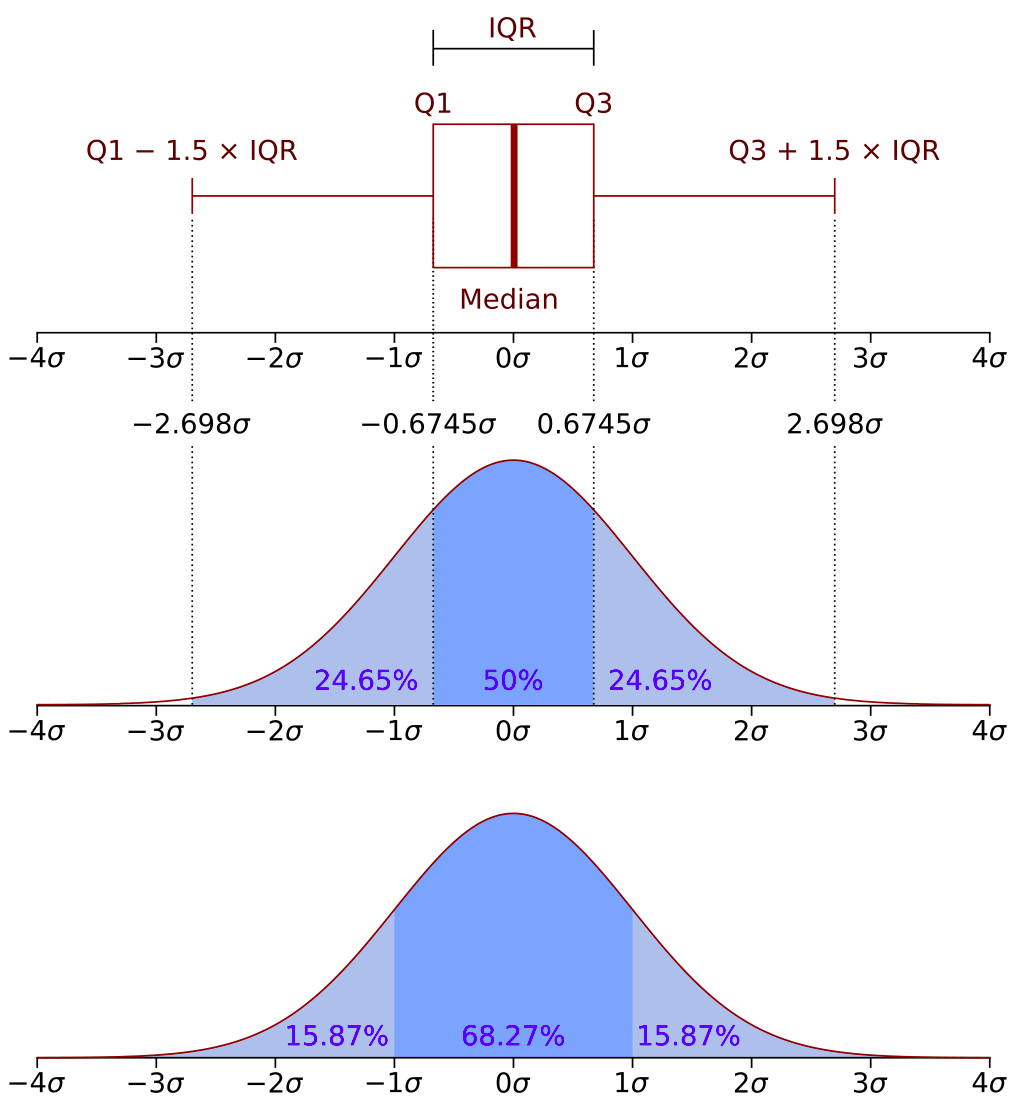

In [40]:
df.agg(
    {
        'Age': ['min', 'mean', 'median'],
        'Fare': ['max', 'mean']
    }
)

,Age,Fare
min,0.420000,NaN
mean,29.699118,32.204208
median,28.000000,NaN
max,NaN,512.329200


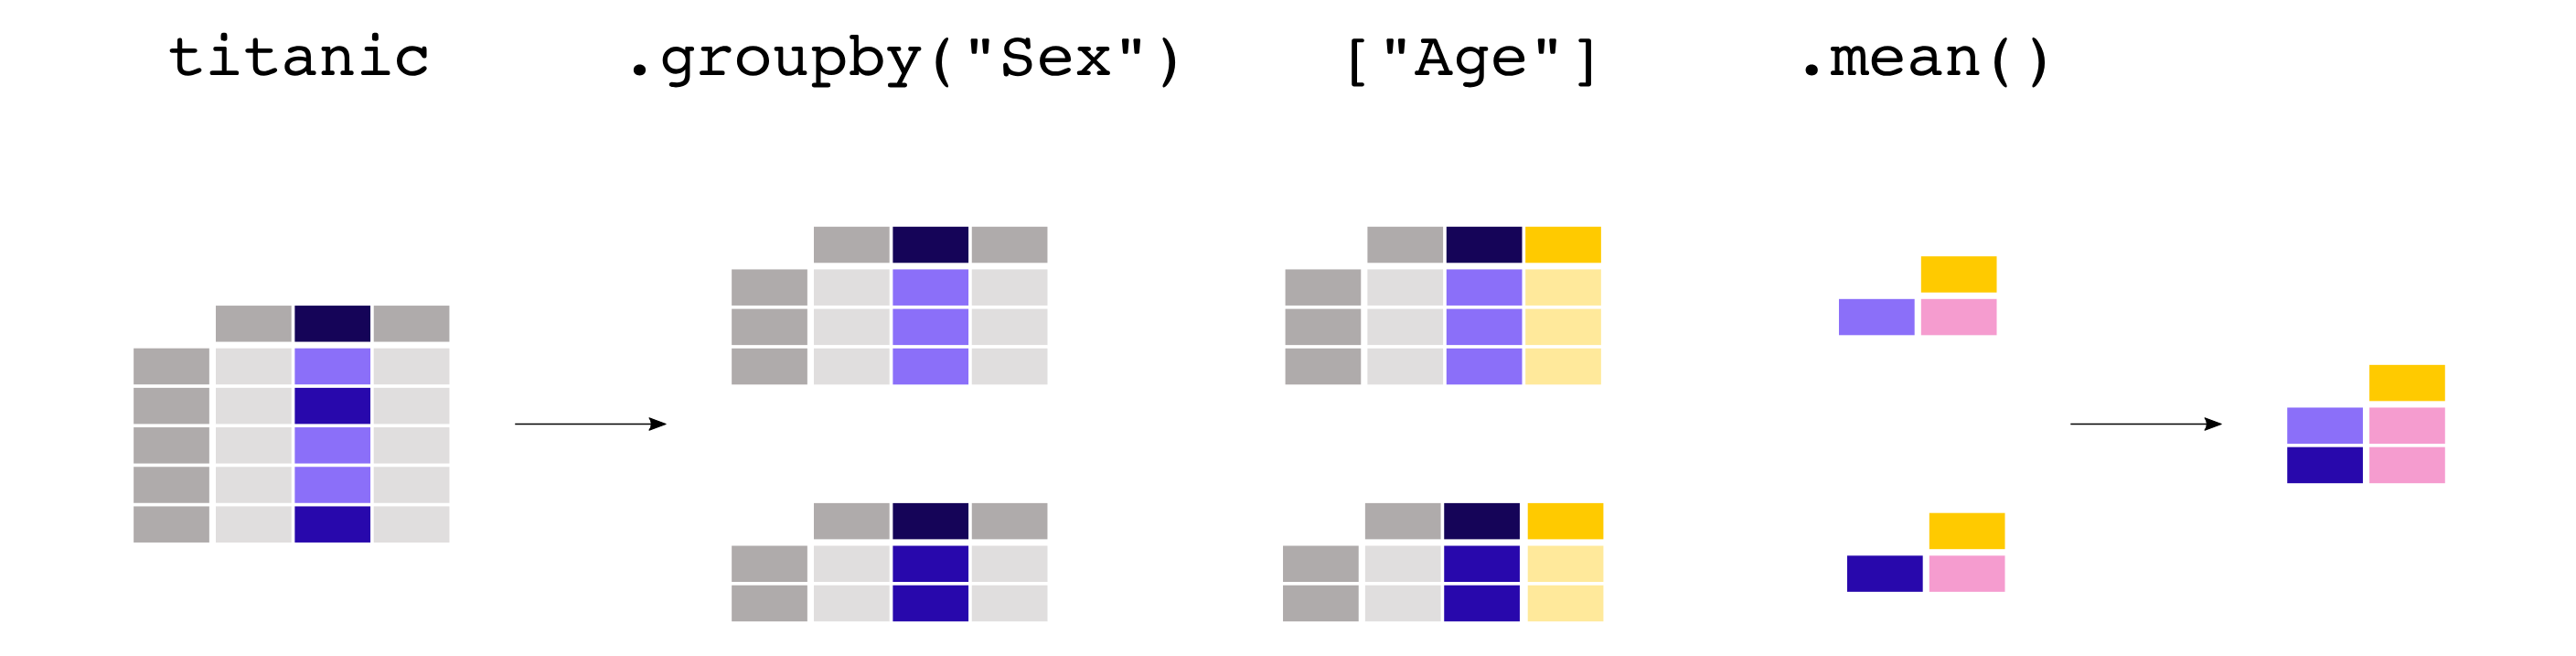

In [42]:
df[['Sex', 'Age']].groupby('Sex').median()

,Age
Sex,
female,27.0
male,29.0


In [50]:
df.groupby('Sex').median(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,414.5,1.0,2.0,27.0,0.0,0.0,23.0
male,464.0,0.0,3.0,29.0,0.0,0.0,10.5


In [51]:
df.groupby(['Sex', 'Pclass'])['Fare'].mean()

Sex     Pclass
female  1         106.125798
        2          21.970121
        3          16.118810
male    1          67.226127
        2          19.741782
        3          12.661633
Name: Fare, dtype: float64

In [52]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [53]:
df.groupby('Pclass')['Pclass'].count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

## Как изменить структуру таблиц

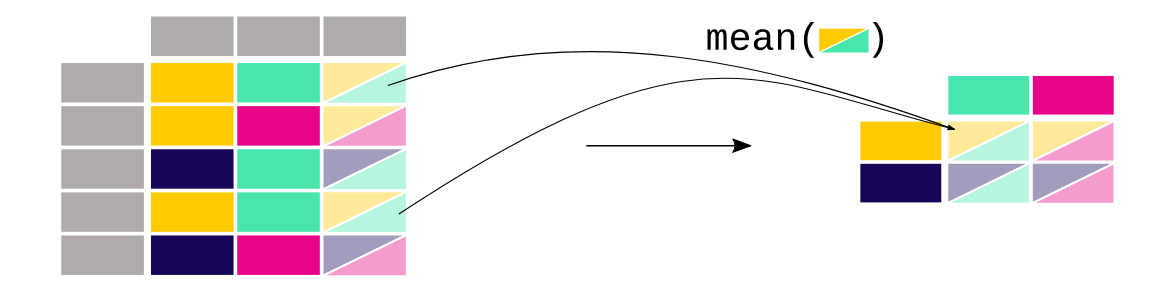

### Загрузка данных двух датасетов: Titanic и Air quality

In [2]:
titanic = pd.read_csv('../data/titanic.csv')
air_quality = pd.read_csv('../data/air_quality_long.csv', index_col="date.utc", parse_dates=True)
(len(titanic), len(air_quality))

(891, 5272)

In [5]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
air_quality

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-18 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.0,µg/m³
2019-06-17 08:00:00+00:00,Antwerpen,BE,BETR801,pm25,6.5,µg/m³
2019-06-17 07:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.5,µg/m³
2019-06-17 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,16.0,µg/m³
2019-06-17 05:00:00+00:00,Antwerpen,BE,BETR801,pm25,7.5,µg/m³
...,...,...,...,...,...,...
2019-04-09 06:00:00+00:00,London,GB,London Westminster,no2,41.0,µg/m³
2019-04-09 05:00:00+00:00,London,GB,London Westminster,no2,41.0,µg/m³
2019-04-09 04:00:00+00:00,London,GB,London Westminster,no2,41.0,µg/m³


### Сортировка

In [7]:
titanic.sort_values(by='Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [8]:
titanic.sort_values(by=['Pclass', 'Age'], ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C
793,794,0,1,"Hoyt, Mr. William Fisher",male,NaN,0,0,PC 17600,30.6958,NaN,C
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C


### Создание сводных таблиц (pivot)

In [ ]:
air_quality

In [ ]:
no2 = air_quality[air_quality['parameter'] == 'no2']
no2

In [ ]:
no2_subset = no2.sort_index().groupby('location').head(2)
no2_subset

In [ ]:
no2_subset.pivot(columns='location', values='value')

In [ ]:
no2

In [ ]:
no2.pivot(columns='location', values='value').plot()

In [ ]:
air_quality.pivot_table(values='value', index='location', columns='parameter', aggfunc='mean')

In [ ]:
air_quality.pivot_table(
    values='value', 
    index='location', 
    columns='parameter', 
    aggfunc='mean',
    margins=True,
)

In [ ]:
air_quality.groupby(['parameter', 'location'])[['value']].mean()

In [ ]:
no2_pivoted = no2.pivot(columns="location", values="value").reset_index()
no2_pivoted

### Обратное преобразование из сводной таблицы (из "широкой" в "длинную")

In [ ]:
no_2 = no2_pivoted.melt(id_vars="date.utc")
no_2

In [ ]:
no_2 = no2_pivoted.melt(
    id_vars="date.utc",
    value_vars=["BETR801", "FR04014", "London Westminster"],
    value_name="NO_2",
    var_name="id_location",
)
no_2

### Ещё раз о преобразовании на основе простой таблицы (pivot <=> melt)

In [ ]:
# date_range = pd.date_range(start='2017-12-20', periods=6, freq='12H')

date_range = pd.DatetimeIndex(
    [
        '2017-12-20 8:00:00', '2017-12-20 9:00:00', '2017-12-20 10:00:00', 
        '2017-12-20 8:00:00', '2017-12-20 9:00:00', '2017-12-20 10:00:00'
    ],
    dtype='datetime64[ns]'
)
date_range

In [ ]:
sales_dict = {
    'date': date_range,
    'place': ['PL1', 'PL1', 'PL1', 'PL2', 'PL2', 'PL2'],
    'item': ['iphone 13', 'iphone 14', 'iphone 15', 'iphone 13', 'iphone 14', 'iphone 15'],
    'price': [1000, 1200, 1300, 999, 1119, 1250],
}
sales = pd.DataFrame(sales_dict)
sales

In [ ]:
sales_pivoted = sales.pivot_table(index='date', columns='place', values='price', aggfunc='max')  # , margins=True)
sales_pivoted

In [ ]:
sales_pivoted.melt()

## Как объединить данные из нескольких таблиц

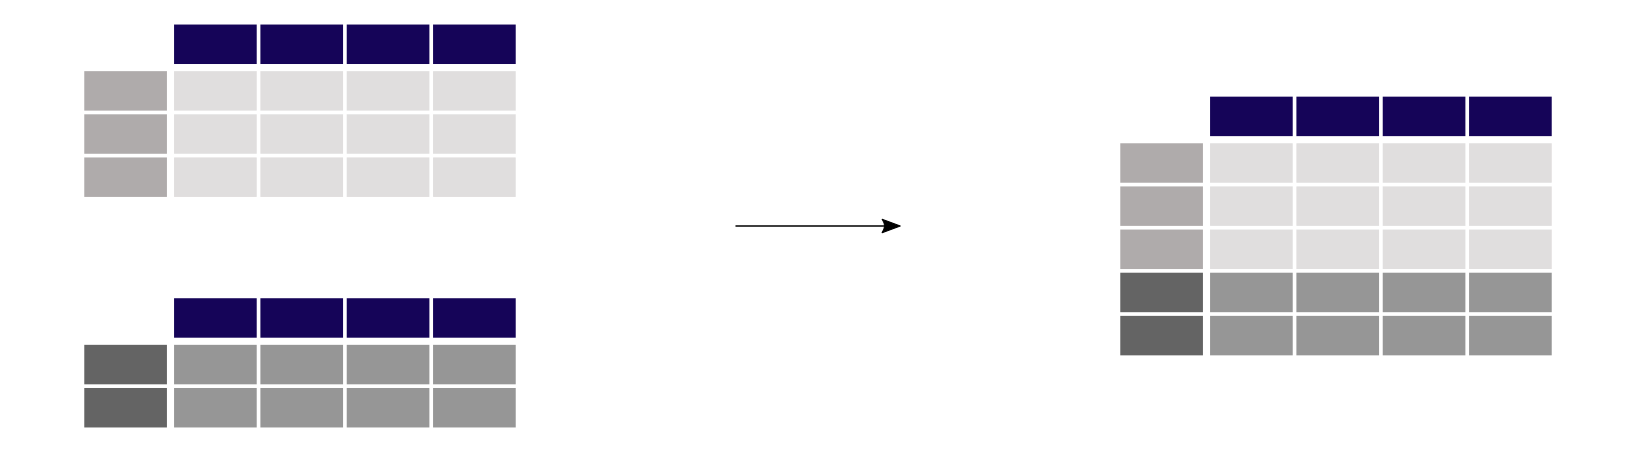

https://github.com/pandas-dev/pandas/tree/main/doc/data

In [3]:
air_quality_pm25 = pd.read_csv("../data/air_quality_pm25_long.csv", parse_dates=True)
air_quality_no2 = pd.read_csv("../data/air_quality_no2_long.csv", parse_dates=True)

In [7]:
air_quality_no2

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³


In [8]:
air_quality_pm25

,city,country,date.utc,location,parameter,value,unit
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³
...,...,...,...,...,...,...,...
1105,London,GB,2019-05-07 06:00:00+00:00,London Westminster,pm25,9.0,µg/m³
1106,London,GB,2019-05-07 04:00:00+00:00,London Westminster,pm25,8.0,µg/m³
1107,London,GB,2019-05-07 03:00:00+00:00,London Westminster,pm25,8.0,µg/m³
1108,London,GB,2019-05-07 02:00:00+00:00,London Westminster,pm25,8.0,µg/m³


In [6]:
air_quality = pd.concat([air_quality_pm25, air_quality_no2], axis=0)  # .reset_index()
air_quality

,city,country,date.utc,location,parameter,value,unit
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³
...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³


In [4]:
pd.concat([air_quality_pm25, air_quality_no2], axis=1)

,city,country,date.utc,location,parameter,value,unit,city,country,date.utc,location,parameter,value,unit
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³
2064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³
2065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³
2066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³


In [15]:
air_quality = air_quality.sort_values('date.utc')
air_quality

,city,country,date.utc,location,parameter,value,unit
2067,London,GB,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,µg/m³
1003,Paris,FR,2019-05-07 01:00:00+00:00,FR04014,no2,25.0,µg/m³
100,Antwerpen,BE,2019-05-07 01:00:00+00:00,BETR801,pm25,12.5,µg/m³
1098,Antwerpen,BE,2019-05-07 01:00:00+00:00,BETR801,no2,50.5,µg/m³
1109,London,GB,2019-05-07 01:00:00+00:00,London Westminster,pm25,8.0,µg/m³
...,...,...,...,...,...,...,...
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
102,London,GB,2019-06-20 23:00:00+00:00,London Westminster,pm25,7.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
101,London,GB,2019-06-21 00:00:00+00:00,London Westminster,pm25,7.0,µg/m³


In [16]:
air_quality = pd.concat([air_quality_pm25, air_quality_no2], keys=['PM25', 'NO2'])
air_quality

city country                   date.utc            location  \
PM25 0     Antwerpen      BE  2019-06-18 06:00:00+00:00             BETR801   
     1     Antwerpen      BE  2019-06-17 08:00:00+00:00             BETR801   
     2     Antwerpen      BE  2019-06-17 07:00:00+00:00             BETR801   
     3     Antwerpen      BE  2019-06-17 06:00:00+00:00             BETR801   
     4     Antwerpen      BE  2019-06-17 05:00:00+00:00             BETR801   
...              ...     ...                        ...                 ...   
NO2  2063     London      GB  2019-05-07 06:00:00+00:00  London Westminster   
     2064     London      GB  2019-05-07 04:00:00+00:00  London Westminster   
     2065     London      GB  2019-05-07 03:00:00+00:00  London Westminster   
     2066     London      GB  2019-05-07 02:00:00+00:00  London Westminster   
     2067     London      GB  2019-05-07 01:00:00+00:00  London Westminster   

          parameter  value   unit  
PM25 0         pm25   18.0  µg/m³  
     1         pm25    6.5  µg/m³  
     2         pm25   18.5  µg/m³  
     3         pm25   16.0  µg/m³  
     4         pm25    7.5  µg/m³  
...             ...    ...    ...  
NO2  2063       no2   26.0  µg/m³  
     2064       no2   16.0  µg/m³  
     2065       no2   19.0  µg/m³  
     2066       no2   19.0  µg/m³  
     2067       no2   23.0  µg/m³  

[3178 rows x 7 columns]

### Объединение таблиц, используя общий идентификатор

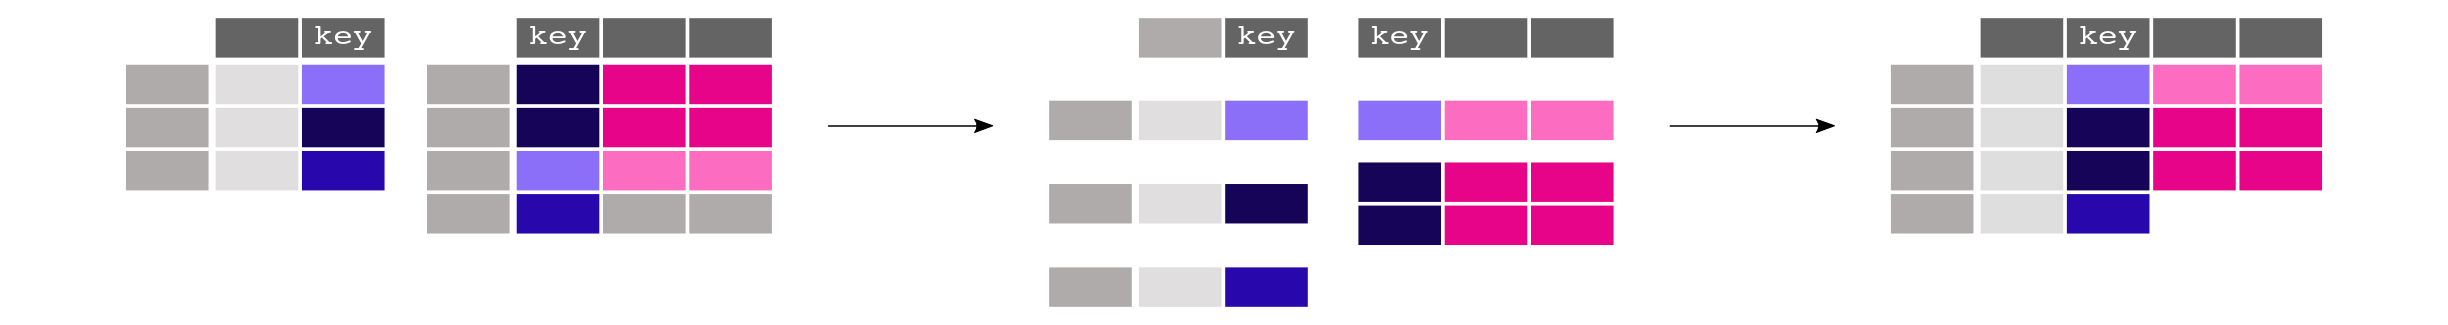

In [5]:
stations_coord = pd.read_csv("../data/air_quality_stations.csv")
stations_coord

,location,coordinates.latitude,coordinates.longitude
0,BELAL01,51.23619,4.38522
1,BELHB23,51.17030,4.34100
2,BELLD01,51.10998,5.00486
3,BELLD02,51.12038,5.02155
4,BELR833,51.32766,4.36226
...,...,...,...
61,Southend-on-Sea,51.54420,0.67841
62,Southwark A2 Old Kent Road,51.48050,-0.05955
63,Thurrock,51.47707,0.31797
64,Tower Hamlets Roadside,51.52253,-0.04216


In [7]:
air_quality = pd.merge(air_quality, stations_coord, how="left", on="location")
air_quality

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³,51.20966,4.43182
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³,51.20966,4.43182
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³,51.20966,4.43182
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³,51.20966,4.43182
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³,51.20966,4.43182
...,...,...,...,...,...,...,...,...,...
4177,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³,51.49467,-0.13193
4178,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³,51.49467,-0.13193
4179,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³,51.49467,-0.13193
4180,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³,51.49467,-0.13193


In [9]:
air_quality_parameters = pd.read_csv("../data/air_quality_parameters.csv")
air_quality_parameters

,id,description,name
0,bc,Black Carbon,BC
1,co,Carbon Monoxide,CO
2,no2,Nitrogen Dioxide,NO2
3,o3,Ozone,O3
4,pm10,Particulate matter less than 10 micrometers in...,PM10
5,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
6,so2,Sulfur Dioxide,SO2


In [10]:
air_quality = pd.merge(air_quality, air_quality_parameters, how='left', left_on='parameter', right_on='id')
air_quality

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude,id,description,name
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³,51.20966,4.43182,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³,51.20966,4.43182,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³,51.20966,4.43182,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³,51.20966,4.43182,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³,51.20966,4.43182,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
...,...,...,...,...,...,...,...,...,...,...,...,...
4177,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³,51.49467,-0.13193,no2,Nitrogen Dioxide,NO2
4178,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³,51.49467,-0.13193,no2,Nitrogen Dioxide,NO2
4179,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³,51.49467,-0.13193,no2,Nitrogen Dioxide,NO2
4180,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³,51.49467,-0.13193,no2,Nitrogen Dioxide,NO2


## Как легко обрабатывать данные временных рядов

In [18]:
air_quality = pd.read_csv("../data/air_quality_no2_long.csv")
air_quality

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³


In [19]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       2068 non-null   object 
 1   country    2068 non-null   object 
 2   date.utc   2068 non-null   object 
 3   location   2068 non-null   object 
 4   parameter  2068 non-null   object 
 5   value      2068 non-null   float64
 6   unit       2068 non-null   object 
dtypes: float64(1), object(6)
memory usage: 113.2+ KB


In [20]:
air_quality.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [21]:
air_quality['date.utc'] = pd.to_datetime(air_quality['date.utc'])

In [22]:
air_quality

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³


In [ ]:
air_quality.info()

In [25]:
air_quality['date.utc'].min(), air_quality['date.utc'].max()

(Timestamp('2019-05-07 01:00:00+0000', tz='UTC'),
 Timestamp('2019-06-21 00:00:00+0000', tz='UTC'))

In [26]:
air_quality['date.utc'].mean()

Timestamp('2019-05-27 20:49:29.825918720+0000', tz='UTC')

In [27]:
air_quality['date.utc'].min() - air_quality['date.utc'].max()

Timedelta('-45 days +01:00:00')

In [28]:
air_quality['month'] = air_quality['date.utc'].dt.month
air_quality

,city,country,date.utc,location,parameter,value,unit,month
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6
...,...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³,5
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³,5
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³,5
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³,5


In [25]:
air_quality_weekday = air_quality.groupby([air_quality['date.utc'].dt.weekday, 'location'])['value'].mean()
air_quality_weekday

date.utc  location          
0         BETR801               27.875000
          FR04014               24.856250
          London Westminster    23.969697
1         BETR801               22.214286
          FR04014               30.999359
          London Westminster    24.885714
2         BETR801               21.125000
          FR04014               29.165753
          London Westminster    23.460432
3         BETR801               27.500000
          FR04014               28.600690
          London Westminster    24.780142
4         BETR801               28.400000
          FR04014               31.617986
          London Westminster    26.446809
5         BETR801               33.500000
          FR04014               25.266154
          London Westminster    24.977612
6         BETR801               21.896552
          FR04014               23.274306
          London Westminster    24.859155
Name: value, dtype: float64

<Axes: xlabel='date.utc,location'>

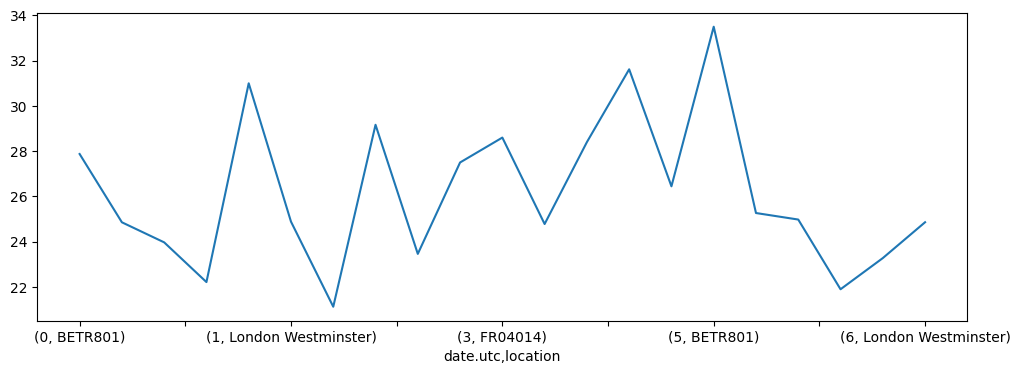

In [32]:
air_quality_weekday.plot(figsize=(12, 4))

Разделить на три локации и вывести на одном линейном графике

In [33]:
from matplotlib import pyplot as plt

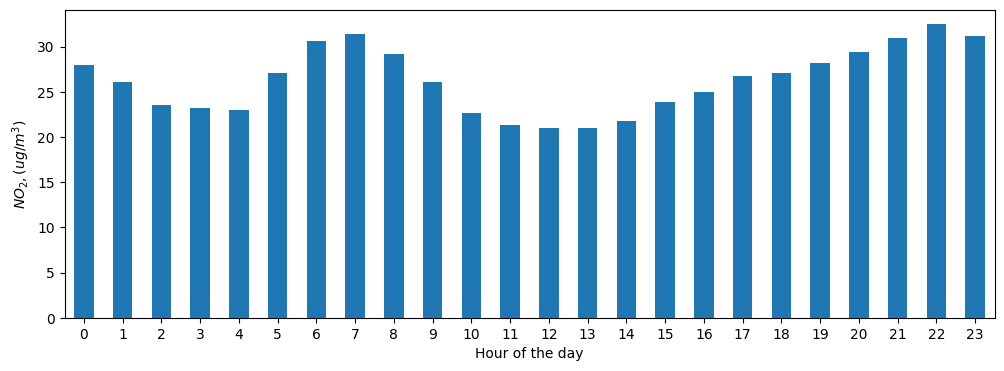

In [34]:
fig, axs = plt.subplots(figsize=(12, 4))
air_quality.groupby(air_quality['date.utc'].dt.hour)['value'].mean().plot(kind='bar', rot=0, ax=axs)
plt.xlabel('Hour of the day');
plt.ylabel('$NO_2, (ug/m^3)$');

In [21]:
no_2 = air_quality.pivot(index='date.utc', columns='location', values='value')
no_2

location,BETR801,FR04014,London Westminster
date.utc,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN
...,...,...,...
2019-06-20 20:00:00+00:00,NaN,21.4,NaN
2019-06-20 21:00:00+00:00,NaN,24.9,NaN
2019-06-20 22:00:00+00:00,NaN,26.5,NaN


In [23]:
no_2.columns

Index(['BETR801', 'FR04014', 'London Westminster'], dtype='object', name='location')

In [26]:
table_first = pd.DataFrame(air_quality_weekday)
table_first

value
date.utc location                     
0        BETR801             27.875000
         FR04014             24.856250
         London Westminster  23.969697
1        BETR801             22.214286
         FR04014             30.999359
         London Westminster  24.885714
2        BETR801             21.125000
         FR04014             29.165753
         London Westminster  23.460432
3        BETR801             27.500000
         FR04014             28.600690
         London Westminster  24.780142
4        BETR801             28.400000
         FR04014             31.617986
         London Westminster  26.446809
5        BETR801             33.500000
         FR04014             25.266154
         London Westminster  24.977612
6        BETR801             21.896552
         FR04014             23.274306
         London Westminster  24.859155

In [29]:
table_first.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 21 entries, (0, 'BETR801') to (6, 'London Westminster')
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   21 non-null     float64
dtypes: float64(1)
memory usage: 376.0+ bytes


In [27]:
table_first.index

MultiIndex([(0,            'BETR801'),
            (0,            'FR04014'),
            (0, 'London Westminster'),
            (1,            'BETR801'),
            (1,            'FR04014'),
            (1, 'London Westminster'),
            (2,            'BETR801'),
            (2,            'FR04014'),
            (2, 'London Westminster'),
            (3,            'BETR801'),
            (3,            'FR04014'),
            (3, 'London Westminster'),
            (4,            'BETR801'),
            (4,            'FR04014'),
            (4, 'London Westminster'),
            (5,            'BETR801'),
            (5,            'FR04014'),
            (5, 'London Westminster'),
            (6,            'BETR801'),
            (6,            'FR04014'),
            (6, 'London Westminster')],
           names=['date.utc', 'location'])

In [36]:
no_2.index.year, no_2.index.weekday

(Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
        ...
        2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
       dtype='int32', name='date.utc', length=1033),
 Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        ...
        3, 3, 3, 3, 3, 3, 3, 3, 3, 4],
       dtype='int32', name='date.utc', length=1033))

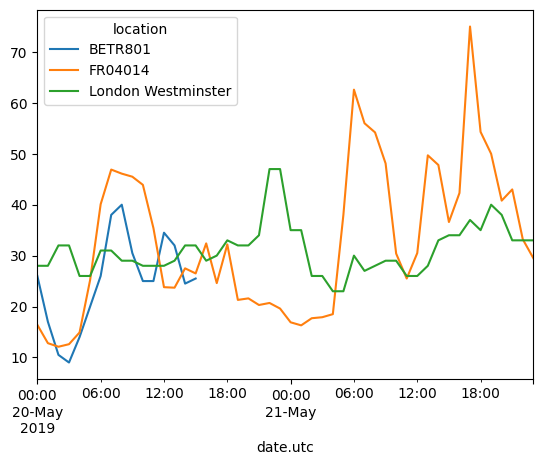

In [37]:
no_2['2019-05-20':'2019-05-21'].plot();

In [54]:
period_max = no_2.resample('W').max()
period_max

location,BETR801,FR04014,London Westminster
date.utc,,,
2019-05-12 00:00:00+00:00,50.5,77.7,97.0
2019-05-19 00:00:00+00:00,41.5,67.5,49.0
2019-05-26 00:00:00+00:00,74.5,97.0,60.0
2019-06-02 00:00:00+00:00,52.5,84.7,52.0
2019-06-09 00:00:00+00:00,15.0,59.0,40.0
2019-06-16 00:00:00+00:00,42.5,78.3,51.0
2019-06-23 00:00:00+00:00,45.0,73.3,17.0


In [55]:
period_max.index.freq

<Week: weekday=6>

<Axes: xlabel='date.utc'>

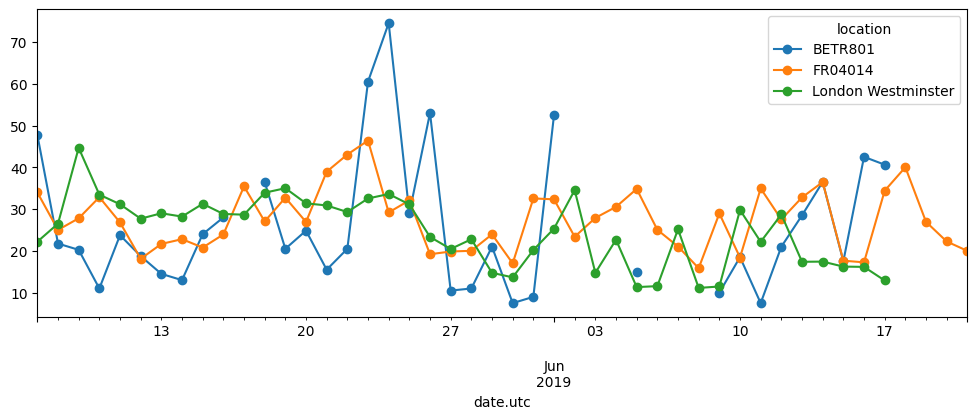

In [56]:
no_2.resample('D').mean().plot(style='-o', figsize=(12,4))

## Как манипулировать текстовыми данными

In [7]:
titanic = pd.read_csv('../data/titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
titanic.Name.str.lower()

0                                braund, mr. owen harris
1      cumings, mrs. john bradley (florence briggs th...
2                                 heikkinen, miss. laina
3           futrelle, mrs. jacques heath (lily may peel)
4                               allen, mr. william henry
                             ...                        
886                                montvila, rev. juozas
887                         graham, miss. margaret edith
888             johnston, miss. catherine helen "carrie"
889                                behr, mr. karl howell
890                                  dooley, mr. patrick
Name: Name, Length: 891, dtype: object

In [13]:
len(dir(titanic.Name.str))

98

In [12]:
len(dir(str))

78

In [20]:
titanic.Name.str.split(',')

0                             [Braund,  Mr. Owen Harris]
1      [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                              [Heikkinen,  Miss. Laina]
3        [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                            [Allen,  Mr. William Henry]
                             ...                        
886                             [Montvila,  Rev. Juozas]
887                      [Graham,  Miss. Margaret Edith]
888          [Johnston,  Miss. Catherine Helen "Carrie"]
889                             [Behr,  Mr. Karl Howell]
890                               [Dooley,  Mr. Patrick]
Name: Name, Length: 891, dtype: object

In [17]:
titanic['Surname'] = titanic.Name.str.split(',').str.get(0)

In [18]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Behr


In [30]:
titanic.Name.str.contains('Countess')

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Name, Length: 891, dtype: bool

In [31]:
titanic[titanic.Name.str.contains('Countess')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,Rothes


In [36]:
titanic.Name.str.len().idxmax()

307

In [44]:
titanic[titanic['PassengerId'] == titanic.Name.str.len().idxmax() + 1].Name

307    Penasco y Castellana, Mrs. Victor de Satode (M...
Name: Name, dtype: object

In [45]:
titanic['Sex_shot'] = titanic.Sex.replace({'male':'M', 'female': 'F'})
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Sex_shot
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,F
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,F
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,F
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila,M
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham,F
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston,F
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Behr,M


In [54]:
titanic.Cabin.str.contains(' ')

0        NaN
1      False
2        NaN
3      False
4        NaN
       ...  
886      NaN
887    False
888      NaN
889    False
890      NaN
Name: Cabin, Length: 891, dtype: object

In [56]:
titanic.Cabin.str.contains(' ').isna()

0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: Cabin, Length: 891, dtype: bool

In [60]:
titanic[(titanic.Cabin.str.contains(' ').isna() == False) & titanic.Cabin.str.contains(' ')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Sex_shot
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S,Fortune,M
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.00,0,0,348123,7.6500,F G73,S,Moen,M
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,C23 C25 C27,S,Fortune,F
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.00,0,1,PC 17759,63.3583,D10 D12,C,Greenfield,M
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C,Baxter,M
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C,Peter,F
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,Allison,F
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.00,0,1,PC 17558,247.5208,B58 B60,C,Baxter,F
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,Allison,M
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,Ryerson,F
